# <CENTER> IMPORTING DEPENDENCIES

In [ ]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop = stopwords.words("english")

import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn import set_config
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
import joblib

set_config(display='diagram')

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Connecting to google drive to import files



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <center> Reading the files

In [ ]:
hk_sent = pd.read_csv("/content/drive/MyDrive/files/hk_sent_final.csv")
music_sent = pd.read_csv("/content/drive/MyDrive/files/music_sent_final.csv")

In [ ]:
print("HOUSE AND KITCHEN DATASET SHAPE:",hk_sent.shape)

HOUSE AND KITCHEN DATASET SHAPE: (4252671, 7)


In [ ]:
print("MUSIC DATASET SHAPE:", music_sent.shape)

MUSIC DATASET SHAPE: (500176, 6)


In [ ]:
hk_sent.head()

,Unnamed: 0,date,review,subjectivity,polarity,Analysis,preprocessed
0,0,2012-10-04,have you ever thought about how you met your b...,0.557619,0.294524,Positive,ever thought met best friend normal wacky like...
1,1,2011-03-22,the butter dish is serving us well and keeping...,0.433333,0.200000,Positive,butter dish serving u well keeping butter fres...
2,2,2008-06-30,i anxiously waited for the book i had pre orde...,0.645635,0.339286,Positive,anxiously waited book pre ordered pic beautifu...
3,3,2010-06-24,fantastic book a lot of good original recipes ...,0.675000,0.625833,Positive,fantastic book lot good original recipe nicely...
4,4,2014-02-23,can not wait to try all the amazing techniques...,0.900000,0.600000,Positive,wait try amazing technique browsed say book lo...


In [ ]:
hk_sent.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
music_sent.head()

,date,review,preprocessed,subjectivity,polarity,Analysis
0,11-03-2014,the portfolio is fine except for the fact that...,portfolio fine except fact last movement sonat...,0.205556,0.072222,Positive
1,06-06-2013,if you are a serious violin student on a budge...,serious violin student budget edition piano ac...,0.610185,0.209259,Positive
2,14-10-2013,this is and excellent edition and perfectly tr...,excellent edition perfectly true orchestral ve...,0.712500,0.662500,Positive
3,23-09-2010,perfect for someone who is an opera fan or a w...,perfect someone opera fan working musicianaida...,0.388889,0.261111,Positive
4,17-10-2012,how many nocturnes does it contain all of them...,many nocturne contain someunable determnine co...,0.520833,0.104167,Positive


In [ ]:
hk_sent.isnull().sum()

date              0
review            0
subjectivity      0
polarity          0
Analysis          0
preprocessed    117
dtype: int64

In [ ]:
music_sent.isnull().sum()

date              0
review          453
preprocessed    470
subjectivity      0
polarity          0
Analysis          0
dtype: int64

In [ ]:
hk_sent.dropna(inplace = True)

In [ ]:
music_sent.dropna(inplace = True)

# <CENTER> AMAZON REVIEWS ANALYSIS - MUSICAL INSTRUMENTS

In [ ]:
#SAMPLING THE DATA INTO A BALANCED DATASET 

In [ ]:
# Separate majority and minority classes
music_pos = music_sent[music_sent['Analysis']=='Positive']
music_neu = music_sent[music_sent['Analysis']=='Neutral']
music_neg = music_sent[music_sent['Analysis']=='Negative']
 

df_music_pos = resample(music_pos, 
                                 replace=False,    
                                 n_samples=35000)

df_music_neu = resample(music_neu, 
                                 replace=True,     
                                 n_samples=35000)

df_music_neg = resample(music_neg, 
                        replace=True, n_samples=35000)

# Combine minority class with downsampled majority class
music_df = pd.concat([df_music_pos, df_music_neu,df_music_neg])

In [ ]:
music_df.shape

(105000, 6)

# <center> SPLITING THE DATASET INTO TRAIN AND TEST

In [ ]:
X = music_df["preprocessed"]
y = music_df["Analysis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# <center> Pipeline Model

In [ ]:
f1_list = []
recall_list = []
precision_list = []
train_accuracy_list = []
test_accuracy_list = []

def f1_score1(precision,recall):
  f1 = 2*(precision * recall)/(precision + recall)
  return f1

In [ ]:
def evaluation(pipeline):
  pipeline = pipeline.fit(X_train, y_train)
  global accuracy_train, accuracy_test, precision1, recall1, f1_score, y_pred_test, y_pred_train
  
  y_pred_train = pipeline.predict(X_train)
  y_pred_test = pipeline.predict(X_test)

  accuracy_train=accuracy_score(y_train, y_pred_train)
  accuracy_test=accuracy_score(y_test, y_pred_test)
  precision1 = precision_score(y_test, y_pred_test,average="weighted")
  recall1 = recall_score(y_test, y_pred_test,average="weighted")
  f1_score2 = f1_score1(precision1, recall1)

  print('Accuracy on train %f' %accuracy_train)
  print('Accuracy on test %f' %accuracy_test)
  print("F1 Score", f1_score2)
  print("Precision Score", precision1)
  print("Recall Score", recall1)

  f1_list.append(f1_score2)
  precision_list.append(precision1)
  recall_list.append(recall1)
  train_accuracy_list.append(accuracy_train)
  test_accuracy_list.append(accuracy_test)

# <CENTER> LOGISTIC REGRESSION

In [ ]:
pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_cv)

Accuracy on train 0.999071
Accuracy on test 0.930000
F1 Score 0.9306665045714567
Precision Score 0.9313339651578336
Recall Score 0.93


In [ ]:
pipeline_lr_tfidf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_lr_tfidf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_tfidf)

Accuracy on train 0.951143
Accuracy on test 0.908381
F1 Score 0.9084284547228457
Precision Score 0.9084759620331183
Recall Score 0.9083809523809524


# <CENTER> DECISION TREE CLASSIFIER

In [ ]:
pipeline_dt_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_cv', DecisionTreeClassifier(criterion= "entropy")),
])

evaluation(pipeline_dt_cv)

Accuracy on train 0.999964
Accuracy on test 0.896000
F1 Score 0.8956872745285487
Precision Score 0.8953747672782999
Recall Score 0.896


In [ ]:
pipeline_dt_tfidf = Pipeline([
    ('vect',TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_tfidf', DecisionTreeClassifier()),
])

evaluation(pipeline_dt_tfidf)

Accuracy on train 0.999964
Accuracy on test 0.888333
F1 Score 0.8883048320035032
Precision Score 0.8882763325024904
Recall Score 0.8883333333333333


# <CENTER> MULTINOMIAL NAIVE BAYES 

In [ ]:
pipeline_mul_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_cv)


Accuracy on train 0.961083
Accuracy on test 0.848000
F1 Score 0.8543401603870859
Precision Score 0.8607758406786323
Recall Score 0.848


In [ ]:
pipeline_mul_tfidf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_tfidf)

Accuracy on train 0.964429
Accuracy on test 0.860667
F1 Score 0.8654341919202484
Precision Score 0.8702548292660005
Recall Score 0.8606666666666667


# <center> SUPPORT VECTOR CLASSIFIER

In [ ]:
pipeline_svc_cv = Pipeline([
    ('vect', CountVectorizer()),
    ('pipeline_svc_cv',LinearSVC()),
])

evaluation(pipeline_svc_cv)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on train 0.981952
Accuracy on test 0.916524
F1 Score 0.9167509598858083
Precision Score 0.9169782228691651
Recall Score 0.9165238095238095


In [ ]:
pipeline_svc_tfidf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('pipeline_svc_tfidf',LinearSVC()),
])

evaluation(pipeline_svc_tfidf)

Accuracy on train 0.964381
Accuracy on test 0.916095
F1 Score 0.9163969759392585
Precision Score 0.9166989126178996
Recall Score 0.9160952380952381


In [ ]:
pipe_dict = {0:'Logistic Regression - CV', 
             1:'Logistic Regression - TFIDF', 
             2:'Decision Tree Classifier - CV', 
             3:'Decision Tree Classifier - TFIDF', 
             4:'Multinomial Naive Bayes - CV', 
             5:'Multinomial Naive Bayes - TFIDF',
             6:'Linear SVC - CV', 
             7:'Linear SVC - TFIDF'}

In [ ]:
final_df = pd.DataFrame(zip(pipe_dict.values(), train_accuracy_list, test_accuracy_list, f1_list, precision_list, recall_list),
                        columns=['Classifier', 'Train Score', 'Test Score','F1 Score', 'Precision Scores', 'Recall Scores'])

In [ ]:
final_df

,Classifier,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
0,Logistic Regression - CV,0.999333,0.933762,0.934196,0.934630,0.933762
1,Logistic Regression - TFIDF,0.951143,0.908381,0.908428,0.908476,0.908381
2,Decision Tree Classifier - CV,0.999964,0.896000,0.895687,0.895375,0.896000
3,Decision Tree Classifier - TFIDF,0.999964,0.888333,0.888305,0.888276,0.888333
4,Multinomial Naive Bayes - CV,0.961083,0.848000,0.854340,0.860776,0.848000
5,Multinomial Naive Bayes - TFIDF,0.964429,0.860667,0.865434,0.870255,0.860667
6,Linear SVC - CV,0.982060,0.923667,0.923762,0.923857,0.923667
7,Linear SVC - TFIDF,0.964381,0.916095,0.916397,0.916699,0.916095


In [ ]:
final_df.sort_values(by='Test Score', ascending=False, inplace=True)

In [ ]:
final_df.set_index('Classifier', inplace=True)

In [ ]:
final_df

,Train Score,Test Score,F1 Score,Precision Scores,Recall Scores
Classifier,,,,,
Logistic Regression - CV,0.999333,0.933762,0.934196,0.934630,0.933762
Linear SVC - CV,0.982060,0.923667,0.923762,0.923857,0.923667
Linear SVC - TFIDF,0.964381,0.916095,0.916397,0.916699,0.916095
Logistic Regression - TFIDF,0.951143,0.908381,0.908428,0.908476,0.908381
Decision Tree Classifier - CV,0.999964,0.896000,0.895687,0.895375,0.896000
Decision Tree Classifier - TFIDF,0.999964,0.888333,0.888305,0.888276,0.888333
Multinomial Naive Bayes - TFIDF,0.964429,0.860667,0.865434,0.870255,0.860667
Multinomial Naive Bayes - CV,0.961083,0.848000,0.854340,0.860776,0.848000


In [ ]:
print('Model with Highest F1 Score:', final_df['Test Score'].idxmax())

Model with Highest F1 Score: Logistic Regression - CV


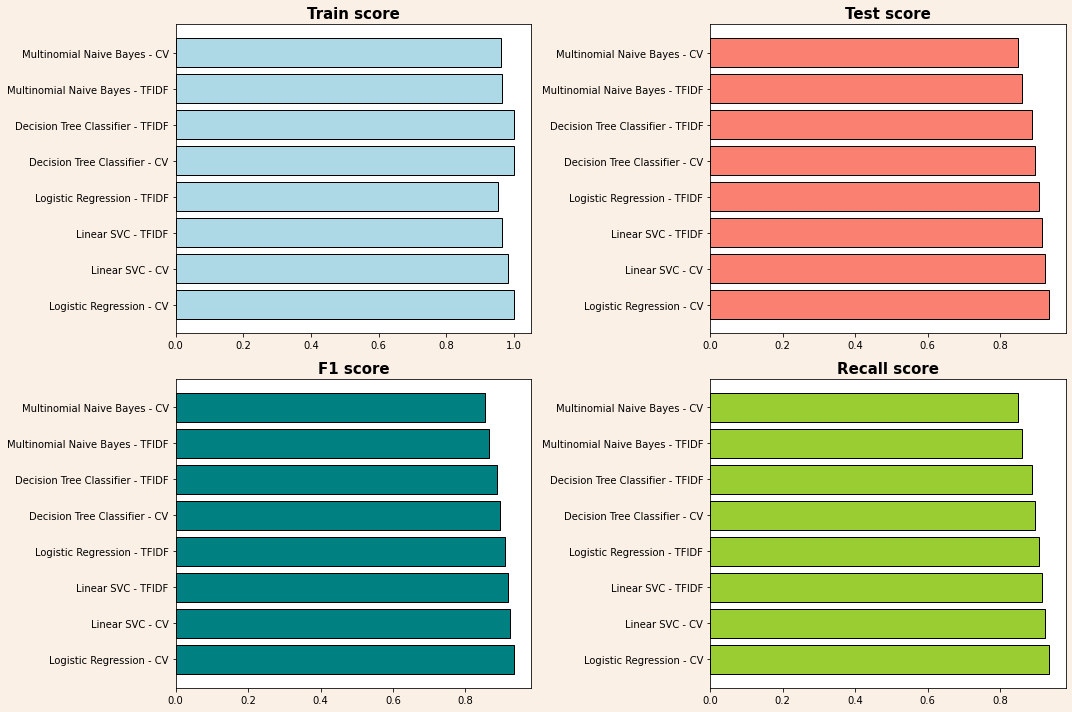

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10), facecolor='linen')

ax1.barh(width=final_df['Train Score'], y = final_df.index, color='lightblue',edgecolor='black')
ax1.set_title('Train score', fontweight='bold', size=15)

ax2.barh(width=final_df['Test Score'], y = final_df.index, color='salmon', edgecolor='black')
ax2.set_title('Test score', fontweight='bold', size=15)

ax3.barh(width=final_df['F1 Score'], y = final_df.index, color='teal', edgecolor='black')
ax3.set_title('F1 score', fontweight='bold', size=15)

ax4.barh(width=final_df['Recall Scores'], y = final_df.index, color='yellowgreen', edgecolor='black')
ax4.set_title('Recall score', fontweight='bold', size=15)


plt.tight_layout()

# <CENTER> AMAZON REVIEWS ANALYSIS - HOUSE & KITCHEN


In [ ]:
hk_sent.head()

,date,review,subjectivity,polarity,Analysis,preprocessed
0,2012-10-04,have you ever thought about how you met your b...,0.557619,0.294524,Positive,ever thought met best friend normal wacky like...
1,2011-03-22,the butter dish is serving us well and keeping...,0.433333,0.200000,Positive,butter dish serving u well keeping butter fres...
2,2008-06-30,i anxiously waited for the book i had pre orde...,0.645635,0.339286,Positive,anxiously waited book pre ordered pic beautifu...
3,2010-06-24,fantastic book a lot of good original recipes ...,0.675000,0.625833,Positive,fantastic book lot good original recipe nicely...
4,2014-02-23,can not wait to try all the amazing techniques...,0.900000,0.600000,Positive,wait try amazing technique browsed say book lo...


# <center> SPLITING THE DATASET INTO TRAIN AND TEST

In [ ]:
#SAMPLING THE DATA INTO A BALANCED DATASET 

In [ ]:
# Separate majority and minority classes
hk_pos = hk_sent[hk_sent['Analysis']=='Positive']
hk_neu = hk_sent[hk_sent['Analysis']=='Neutral']
hk_neg = hk_sent[hk_sent['Analysis']=='Negative']
 

df_hk_pos = resample(hk_pos, 
                                 replace=False,    
                                 n_samples=35000)

df_hk_neu = resample(hk_neu, 
                                 replace=True,     
                                 n_samples=35000)

df_hk_neg = resample(hk_neg, 
                        replace=True, n_samples=35000)

# Combine minority class with downsampled majority class
hk_df = pd.concat([df_hk_pos, df_hk_neu,df_hk_neg])

In [ ]:
X = hk_df["preprocessed"]
y = hk_df["Analysis"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# <center> Pipeline Model

In [ ]:
f1_list = []
recall_list = []
precision_list = []
train_accuracy_list = []
test_accuracy_list = []

def f1_score1(precision,recall):
  f1 = 2*(precision * recall)/(precision + recall)
  return f1

In [ ]:
def evaluation(pipeline):
  pipeline = pipeline.fit(X_train, y_train)
  global accuracy_train, accuracy_test, precision1, recall1, f1_score, y_pred_test, y_pred_train
  
  y_pred_train = pipeline.predict(X_train)
  y_pred_test = pipeline.predict(X_test)

  accuracy_train=accuracy_score(y_train, y_pred_train)
  accuracy_test=accuracy_score(y_test, y_pred_test)
  precision1 = precision_score(y_test, y_pred_test,average="weighted")
  recall1 = recall_score(y_test, y_pred_test,average="weighted")
  f1_score2 = f1_score1(precision1, recall1)

  print('Accuracy on train %f' %accuracy_train)
  print('Accuracy on test %f' %accuracy_test)
  print("F1 Score", f1_score2)
  print("Precision Score", precision1)
  print("Recall Score", recall1)

  f1_list.append(f1_score2)
  precision_list.append(precision1)
  recall_list.append(recall1)
  train_accuracy_list.append(accuracy_train)
  test_accuracy_list.append(accuracy_test)

# <CENTER> LOGISTIC REGRESSION

In [ ]:
pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_cv)

Accuracy on train 0.999179
Accuracy on test 0.933333
F1 Score 0.934032873136413
Precision Score 0.934733462345893
Recall Score 0.9333333333333333


In [ ]:
pipeline_lr_tfidf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_lr_tfidf', LogisticRegression(max_iter=500,random_state=40,solver='newton-cg',multi_class="ovr")),
])

evaluation(pipeline_lr_tfidf)

# <CENTER> DECISION TREE CLASSIFIER

In [ ]:
pipeline_dt_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_cv', DecisionTreeClassifier(criterion= "entropy")),
])

evaluation(pipeline_dt_cv)

Accuracy on train 0.999976
Accuracy on test 0.822143
F1 Score 0.8216216822187354
Precision Score 0.8211011676451112
Recall Score 0.8221428571428572


In [ ]:
pipeline_dt_tfidf = Pipeline([
    ('vect',TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('pipeline_dt_tfidf', DecisionTreeClassifier()),
])

evaluation(pipeline_dt_tfidf)

Accuracy on train 0.999976
Accuracy on test 0.813524
F1 Score 0.8128921806510067
Precision Score 0.8122615318245541
Recall Score 0.8135238095238095


# <CENTER> MULTINOMIAL NAIVE BAYES 

In [ ]:
pipeline_mul_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_cv)

Accuracy on train 0.941167
Accuracy on test 0.665333
F1 Score 0.7005091773692149
Precision Score 0.7396121032049691
Recall Score 0.6653333333333333


In [ ]:
pipeline_mul_tfidf = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', MultinomialNB()),
])

evaluation(pipeline_mul_tfidf)

Accuracy on train 0.926655
Accuracy on test 0.687857
F1 Score 0.7166633591909629
Precision Score 0.74798773631047
Recall Score 0.6878571428571428


# <center> SUPPORT VECTOR CLASSIFIER

In [ ]:
pipeline_svc_cv = Pipeline([
    ('vect', CountVectorizer()),
    ('pipeline_svc_cv',LinearSVC()),
])

evaluation(pipeline_svc_cv)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on train 0.967417
Accuracy on test 0.866714
F1 Score 0.8668911156953679
Precision Score 0.8670680178460766
Recall Score 0.8667142857142857


In [ ]:
pipeline_svc_tfidf = Pipeline([
    ('vect',TfidfVectorizer()),
    ('pipeline_svc_tfidf',LinearSVC()),
])

evaluation(pipeline_svc_tfidf)

Accuracy on train 0.945679
Accuracy on test 0.880238
F1 Score 0.8806853290944946
Precision Score 0.8811330176455973
Recall Score 0.8802380952380953


In [ ]:
pipe_dict = {0:'Logistic Regression - CV', 
             1:'Logistic Regression - TFIDF', 
             2:'Decision Tree Classifier - CV', 
             3:'Decision Tree Classifier - TFIDF', 
             4:'Multinomial Naive Bayes - CV', 
             5:'Multinomial Naive Bayes - TFIDF',
             6:'Linear SVC - CV', 
             7:'Linear SVC - TFIDF'}

In [ ]:
final_df = pd.DataFrame(zip(pipe_dict.values(), train_accuracy_list, test_accuracy_list, f1_list, precision_list, recall_list),
                        columns=['Classifier', 'Train Score', 'Test Score','F1 Score', 'Precision Scores', 'Recall Scores'])

In [ ]:
final_df

In [ ]:
final_df.sort_values(by='Test Score', ascending=False, inplace=True)

In [ ]:
final_df.set_index('Classifier', inplace=True)

In [ ]:
final_df

In [ ]:
print('Model with Highest F1 Score:', final_df['Test Score'].idxmax())

Model with Highest F1 Score: Logistic Regression - TFIDF


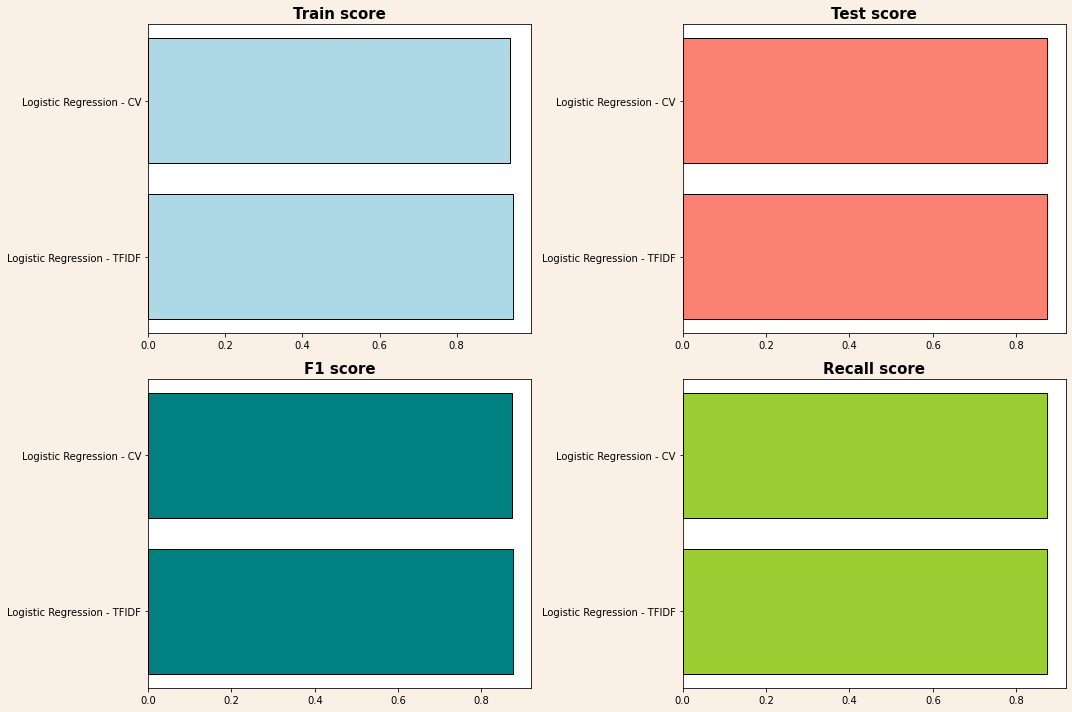

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10), facecolor='linen')

ax1.barh(width=final_df['Train Score'], y = final_df.index, color='lightblue',edgecolor='black')
ax1.set_title('Train score', fontweight='bold', size=15)

ax2.barh(width=final_df['Test Score'], y = final_df.index, color='salmon', edgecolor='black')
ax2.set_title('Test score', fontweight='bold', size=15)

ax3.barh(width=final_df['F1 Score'], y = final_df.index, color='teal', edgecolor='black')
ax3.set_title('F1 score', fontweight='bold', size=15)

ax4.barh(width=final_df['Recall Scores'], y = final_df.index, color='yellowgreen', edgecolor='black')
ax4.set_title('Recall score', fontweight='bold', size=15)


plt.tight_layout()

# <CENTER> PERFORMING HYPERPARAMETER TUNING ON LOGISTIC REGRESSION CV

In [ ]:
params_lr = {'clf__C':[0.5,1,2,3,5,10], #regularisation parameter: As the value of C increases, it reduces the variance.
            'clf__penalty':['l2']} 

In [ ]:
cv = StratifiedKFold(n_splits=7,shuffle=True, random_state=None)

In [ ]:
pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
         ('clf', LogisticRegression(random_state=40,multi_class="ovr"))
])

In [ ]:
gs = GridSearchCV(pipeline_lr_cv, params_lr,cv= cv, verbose=1, n_jobs=-1,scoring='f1_weighted')
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

{'clf__C': 10, 'clf__penalty': 'l2'}

In [ ]:
params_lr2 = {'clf__penalty':['l2'],
                'clf__C':[8,9,10,12],
                'clf__solver': ['newton-cg','saga', 'sag', 'linlinear']}

In [ ]:
gs1 = GridSearchCV(pipeline_lr_cv, params_lr2,cv= cv, verbose=1, n_jobs=-1,scoring='f1_weighted')
gs1.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 112.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fi

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(ngram_range=(1, 2))),
                                       ('clf',
                                        LogisticRegression(multi_class='ovr',
                                                           random_state=40))]),
             n_jobs=-1,
             param_grid={'clf__C': [8, 9, 10, 12], 'clf__penalty': ['l2'],
                         'clf__solver': ['newton-cg', 'saga', 'sag',
                                         'linlinear']},
             scoring='f1_weighted', verbose=1)

In [ ]:
gs1.best_params_

{'clf__C': 8, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}

#<CENTER> FINAL MODEL FOR HOUSE AND KITCHEN DATASET

In [ ]:
pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
         ('clf', LogisticRegression(random_state=40,multi_class="ovr",C=8,penalty="l2",solver="newton-cg",max_iter=500))
])

evaluation(pipeline_lr_cv)

Accuracy on train 0.999881
Accuracy on test 0.935000
F1 Score 0.9355076803967983
Precision Score 0.9360159124073015
Recall Score 0.935


In [ ]:
prediction = pipeline_lr_cv.predict(['this is an amazing product'])
print(prediction)

['Positive']


In [ ]:
def customer_review(pipeline):
  review = input('Enter your review:')
  result = pipeline.predict([str(review)])
  if result == 'Positive':
    print('\033[1;32mThis review is Positive\033[0m')
  elif result == 'Neutral':
    print('\033[1;33mThis review is Neutral\033[0m')
  else:
    print('\033[1;31mThis review is Negative\033[0m')
  return result

In [ ]:
customer_review(pipeline_lr_cv)

Enter your review:not satisfied
This review is Positive


array(['Positive'], dtype=object)

#<CENTER> FINAL MODEL FOR MUSIC DATASET

In [ ]:
pipeline_svc_cv = Pipeline([
    ('vect', CountVectorizer()),
    ('pipeline_svc_cv',LinearSVC()),
])

evaluation(pipeline_svc_cv)

In [ ]:
model = joblib.load('/content/sentiment_analysis_model.pkl')

NameError: ignored

In [ ]:
pipeline_lr_cv = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('clf', LogisticRegression(random_state=40,multi_class="ovr",C=8,penalty="l2",solver="newton-cg",max_iter=500)),
])

# evaluation(pipeline_lr_cv)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipeline_lr_cv,X,y,scoring='accuracy', cv=5)

# <CENTER> EXPORTING MODEL FOR DEPLOYMENT

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
joblib.dump(pipeline_lr_cv, 'sentiment_analysis_model.pkl')

['sentiment_analysis_model.pkl']